Tensorflow built in cifar has 50,000 in train data and 10,000 in test.

I will split it into 30,000 train, 20,000 val, 10,000 test

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras import regularizers

(X_train_full, y_train_full), (X_test, y_test) = datasets.cifar10.load_data()

print(X_train_full.shape)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

X_val, X_train = X_train_full[:20000] / 255.0, X_train_full[20000:] / 255.0
y_val, y_train = y_train_full[:20000], y_train_full[20000:]
X_test = X_test / 255.0

(50000, 32, 32, 3)


Double check if the split was done correctly

In [11]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(30000, 32, 32, 3)
(20000, 32, 32, 3)
(10000, 32, 32, 3)
(30000, 1)
(20000, 1)
(10000, 1)


Create a function to show you the picture and what label it is

Label: dog


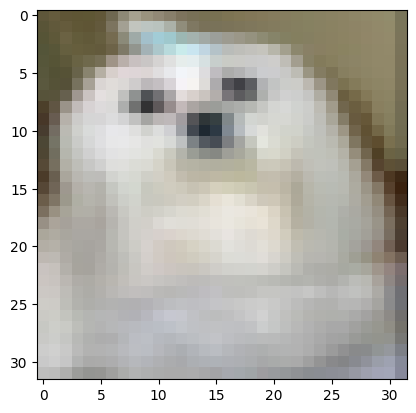

In [12]:
def show_image(X_data,y_data,index):
    plt.imshow(X_data[index], cmap='gray')
    print("Label:",class_names[y_data[index][0]])

show_image(X_train,y_train, 1)

Get the dimensions of the pictures

In [13]:
X_train[0].shape

(32, 32, 3)

Creating our CNN to compare our mutual learning technique

In [14]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(64, 7, padding="same", activation='relu', input_shape=[32,32,3]),

    tf.keras.layers.MaxPooling2D(2),

    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, 3, padding="same", activation='relu' , kernel_regularizer=regularizers.l1(0.0001)),
    tf.keras.layers.Dropout(.2),

    tf.keras.layers.MaxPooling2D(2),

    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, 7, padding="same", activation='relu' , kernel_regularizer=regularizers.l1(0.0001)),
    tf.keras.layers.Dropout(.2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu' , kernel_regularizer=regularizers.l1(0.0001)),
    tf.keras.layers.Dropout(.2),

    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu' , kernel_regularizer=regularizers.l1(0.0001)),
    tf.keras.layers.Dropout(.2),

    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        9472      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 16, 16, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 128)       0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 128)       

In [15]:
tf.random.set_seed(1)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 5)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=64, callbacks= [callback])

Epoch 1/100
469/469 [==============================] - 11s 21ms/step - loss: 4.0054 - accuracy: 0.4113 - val_loss: 3.4446 - val_accuracy: 0.3820
Epoch 2/100
469/469 [==============================] - 9s 20ms/step - loss: 3.0579 - accuracy: 0.5159 - val_loss: 3.1444 - val_accuracy: 0.4969
Epoch 3/100
469/469 [==============================] - 8s 18ms/step - loss: 3.0440 - accuracy: 0.5683 - val_loss: 3.0990 - val_accuracy: 0.5856
Epoch 4/100
469/469 [==============================] - 9s 18ms/step - loss: 3.1038 - accuracy: 0.6030 - val_loss: 3.5923 - val_accuracy: 0.4445
Epoch 5/100
469/469 [==============================] - 9s 18ms/step - loss: 3.1098 - accuracy: 0.6282 - val_loss: 3.3369 - val_accuracy: 0.5397
Epoch 6/100
469/469 [==============================] - 9s 18ms/step - loss: 3.1048 - accuracy: 0.6417 - val_loss: 3.6850 - val_accuracy: 0.4716
Epoch 7/100
469/469 [==============================] - 9s 18ms/step - loss: 3.0701 - accuracy: 0.6596 - val_loss: 3.0375 - val_accuracy

Once tuning is finished, evaluate on testing set.

In [17]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 2.2078 - accuracy: 0.7029


[2.2078263759613037, 0.7028999924659729]

In [18]:
model.save('CNN.h5')